**TorchVision Begineers**

In [1]:
import torch
from torch import nn
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
print(torch.__version__)
print(torchvision.__version__)

2.5.1+cu121
0.20.1+cu121


Getting a dataset (FashionMNIST)

In [2]:
training_data = datasets.FashionMNIST(
    root="data", #Where to download data to
    train=True, #Do we want the training dataset
    download=True, #Do we want to download it
    transform=ToTensor(), #How do we want to transform the data
    target_transform=None, #How do we want to transform the labels/targets
)

test_data = datasets.FashionMNIST(
    root="data", #Where to download data to
    train=False, #Do we want the training dataset
    download=True, #Do we want to download it
    transform=ToTensor(), #How do we want to transform the data
    target_transform=None, #How do we want to transform the labels/targets
)

In [3]:
len(training_data), len(test_data)

(60000, 10000)

In [4]:
image, label = training_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [5]:
class_names = training_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
class_to_idx = training_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [7]:
training_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [8]:
print(f"Image Shape: {image.shape} -> (color channels, height, width) | Image Label: {label}")

Image Shape: torch.Size([1, 28, 28]) -> (color channels, height, width) | Image Label: 9


Image shape: torch.Size([1, 28, 28])


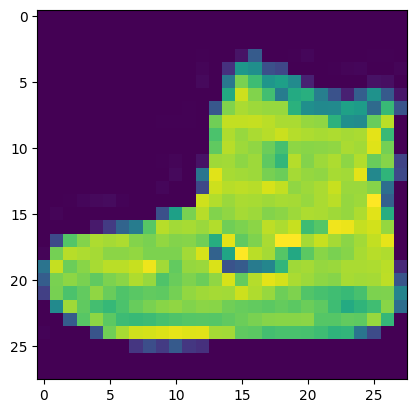

In [9]:
image, label = training_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze())

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

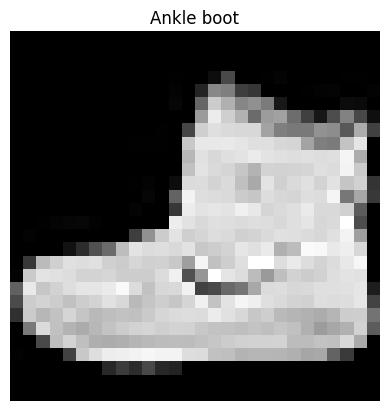

In [10]:
plt.imshow(image.squeeze(), cmap='gray')
plt.title(class_names[label])
plt.axis(False)

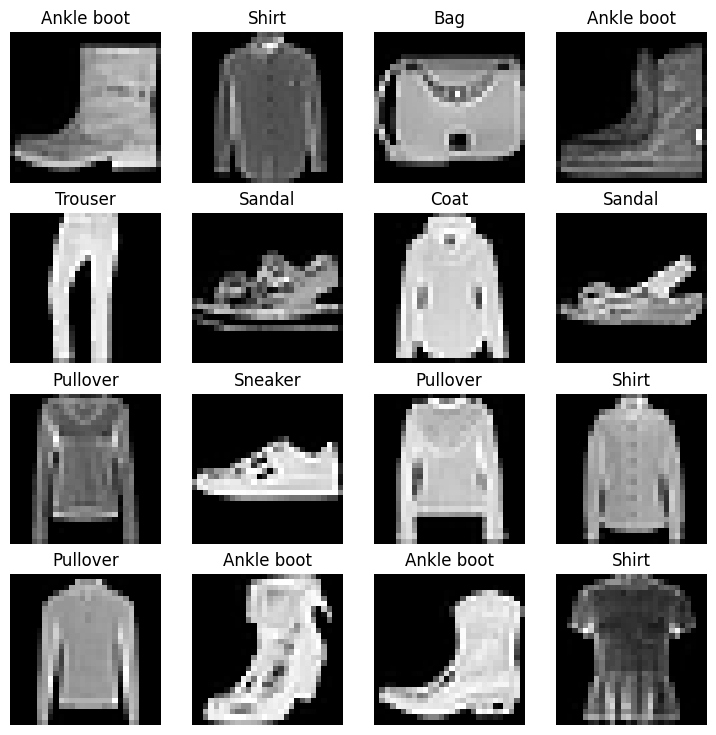

In [11]:
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows*cols+1):
    random_idx = torch.randint(0,len(training_data), size=[1]).item()
    img, label = training_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap='gray')
    plt.title(class_names[label])
    plt.axis(False)

In [12]:
training_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

Using DataLoader

In [13]:
#DataLoader turns dataset into python iterable
#More specifically we want to turn our data into batches or mini batches

In [14]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(dataset=training_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x23508943050>,
 <torch.utils.data.dataloader.DataLoader at 0x23508943290>)

In [15]:
print(f"DataLoaders: {train_dataloader, test_dataloader}")
print(f"Length of train_dataloader: {len(train_dataloader)} batches of size {BATCH_SIZE}")
print(f"Length of test_dataloader: {len(test_dataloader)} batches of size {BATCH_SIZE}")

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x0000023508943050>, <torch.utils.data.dataloader.DataLoader object at 0x0000023508943290>)
Length of train_dataloader: 1875 batches of size 32
Length of test_dataloader: 313 batches of size 32


In [16]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 6, label size: torch.Size([])


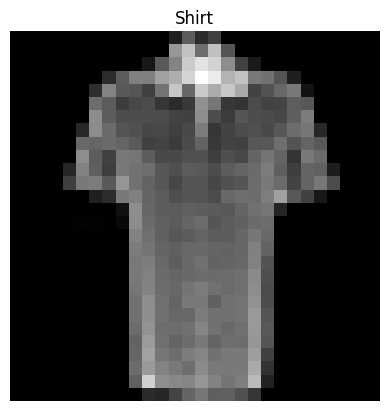

In [17]:
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=(1,)).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap='gray')
plt.title(class_names[label])
plt.axis(False)
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

Creating Baseline Model

In [18]:
flatten_model = nn.Flatten()
x = train_features_batch[0]
output = flatten_model(x)
print(f"Shape before flattening: {x.shape} -> (color channels, height, width)")
print(f"Shape after flattening: {output.shape} -> (color channels, height*width)")

Shape before flattening: torch.Size([1, 28, 28]) -> (color channels, height, width)
Shape after flattening: torch.Size([1, 784]) -> (color channels, height*width)


In [19]:
class FashionMNISTModelV0(nn.Module):
    def __init__(self,
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )

    def forward(self, x):
        return self.layer_stack(x)

In [20]:
torch.manual_seed(42)
model_0 = FashionMNISTModelV0(
    input_shape=784,
    hidden_units=10,
    output_shape=len(class_names)
).to('cpu')
model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [21]:
dummy_x = torch.rand([1, 1, 28, 28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [22]:
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
    print("Already exists")
else:
    print("Downloading")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
    with open("helper_functions.py", "wb") as f:
        f.write(request.content)

Already exists


In [23]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

In [24]:
from timeit import default_timer as Timer
def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

In [25]:
from tqdm.auto import tqdm

torch.manual_seed(42)
train_time_start_on_cpu = Timer()

epochs = 3

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-----")
    #Training
    train_loss = 0
    for batch, (X, y) in enumerate(train_dataloader):
        model_0.train()
        #Forward pass
        y_pred = model_0(X)
        #Calculate loss(per batch)
        loss = loss_fn(y_pred, y)
        train_loss += loss
        #optimizer zero grad
        optimizer.zero_grad()
        #Loss backward
        loss.backward()
        #Optimizer step
        optimizer.step()
        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples.")

    #Divide total train loss by length of train dataloader
    train_loss /= len(train_dataloader)

    #Testing
    test_loss, test_acc = 0, 0
    model_0.eval()
    with torch.inference_mode():
        for X_test, y_test in test_dataloader:
            #Forward pass
            test_pred = model_0(X_test)
            #Calculate loss
            test_loss += loss_fn(test_pred, y_test)
            #Calculate acc
            test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))
        #Calculate test loss avg per batch
        test_loss /= len(test_dataloader)
        #Calculate the test acc avg per batch
        test_acc /= len(test_dataloader)

    print(f"\nTrain Loss: {train_loss:.4f} | Test Loss: {test_loss:.4f} , Test Acc: {test_acc:.4f}")

#Calculate training time
train_time_end_on_cpu = Timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                            end=train_time_end_on_cpu,
                                            device=str(next(model_0.parameters()).device))

c:\Users\lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-----
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.


 33%|███▎      | 1/3 [00:09<00:19,  9.89s/it]


Train Loss: 0.5904 | Test Loss: 0.5102 , Test Acc: 82.0387
Epoch: 1
-----
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.


 67%|██████▋   | 2/3 [00:19<00:09,  9.99s/it]


Train Loss: 0.4743 | Test Loss: 0.5268 , Test Acc: 81.6793
Epoch: 2
-----
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.


100%|██████████| 3/3 [00:30<00:00, 10.01s/it]


Train Loss: 0.4537 | Test Loss: 0.5126 , Test Acc: 82.9972
Train time on cpu: 30.052 seconds


Make predictions and get model 0 results

In [26]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in tqdm(data_loader):
            #Make predictions
            y_pred = model(X)
            #Accumulate the loss and acc values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y,
                               y_pred=y_pred.argmax(dim=1))
            
        #Scale loss and acc to find the avg loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)

    return {"model_name": model.__class__.__name__,
            "model_loss": loss.item(),
            "model_acc": acc}

In [27]:
#Calculate model 0 results on test dataset
model_0_results = eval_model(model=model_0,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)
model_0_results

100%|██████████| 313/313 [00:00<00:00, 347.43it/s]


{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.5125296711921692,
 'model_acc': 83.00718849840256}

Setup device agnostic code (GPU)

In [28]:
!nvidia-smi

Mon Oct  6 18:40:28 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 581.15                 Driver Version: 581.15         CUDA Version: 13.0     |
+-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4060 ...  WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   42C    P8              4W /   45W |     109MiB /   8188MiB |     19%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [29]:
torch.cuda.is_available()

True

In [31]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

Building a better model with non-linearity

In [32]:
class FashionMNISTModelV1(nn.Module):
    def __init__(self,
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape,
                      out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units,
                      out_features=output_shape),
            nn.ReLU()
        )

    def forward(self, x: torch.Tensor):
        return self.layer_stack(x)

In [33]:
next(model_0.parameters()).device

device(type='cpu')

In [34]:
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape=784,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

In [35]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

In [ ]:
#This will now also be added in helper functions version 2.0
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    
    train_loss, train_acc = 0, 0

    #put model into training mode
    model.train()

    for batch, (X, y) in enumerate(data_loader):
        #Put data on target device
        X, y = X.to(device), y.to(device)
        #Forward pass
        y_pred = model(X)
        #Calculate loss and acc(per batch)
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1)) #From logits to prediction labels
        #optimizer zero grad
        optimizer.zero_grad()
        #Loss backward
        loss.backward()
        #Optimizer step
        optimizer.step()
        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(data_loader.dataset)} samples.")
    #Divide total train loss and acc by length of train dataloader
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train Loss: {train_loss:.3f} | Train Acc: {train_acc:.2f}%")

In [ ]:
#Also will be added to helper functions version 2.0
def test_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device = device):
    
    test_loss, test_acc = 0, 0

    model.eval()
    with torch.inference_mode():
        for X, y in test_dataloader:
            #Send data to target device
            X, y = X.to(device), y.to(device)
            #Forward pass
            test_pred = model(X)
            #Calculate loss
            test_loss += loss_fn(test_pred, y)
            #Calculate acc
            test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))
        #Calculate test loss avg per batch
        test_loss /= len(test_dataloader)
        #Calculate the test acc avg per batch
        test_acc /= len(test_dataloader)

    print(f"Test Loss: {test_loss:.3f} | Test Acc: {test_acc:.2f}%")

In [39]:
torch.manual_seed(42)
from timeit import default_timer as Timer
train_time_start_on_gpu = Timer()

epochs = 3

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-----")
    train_step(model=model_1,
               data_loader=train_dataloader,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn,
               device=device)
    test_step(model=model_1,
               data_loader=test_dataloader,
               loss_fn=loss_fn,
               accuracy_fn=accuracy_fn,
               device=device)
    
train_time_end_on_gpu = Timer()

total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-----
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.
Train Loss: 1.092 | Train Acc: 61.34%


 33%|███▎      | 1/3 [00:10<00:20, 10.49s/it]

Test Loss: 0.957 | Test Acc: 64.98%
Epoch: 1
-----
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.
Train Loss: 0.738 | Train Acc: 73.69%


 67%|██████▋   | 2/3 [00:20<00:10, 10.43s/it]

Test Loss: 0.724 | Test Acc: 74.21%
Epoch: 2
-----
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.
Train Loss: 0.668 | Train Acc: 76.08%


100%|██████████| 3/3 [00:31<00:00, 10.42s/it]

Test Loss: 0.688 | Test Acc: 75.64%
Train time on cuda: 31.266 seconds
